In [5]:
from GridWorld_Environment import AstroidGrid
import matplotlib.pyplot as plt
import random
import time
import numpy as np
import pandas as pd

In [6]:
#AS our states dont matter how repressented, e.g. (M,N) = (M*N,1)
#This helper function is used to take the array coords in the 2D matrix of state
#And transpose the coords in the 1D array to select the right row of the q table 
def getflatindex(coords,m,n):
    #Function to get flattened index from index for 2D array
    arr     = np.array([[coords[0]],[coords[1]]])
    ind_out = np.ravel_multi_index(arr, (m,n))
    return int(ind_out)

In [7]:
class QLearning_SAMAR():
    
    def __init__(self,env_in,epsilon,gamma,alpha):
        self.epsilon = epsilon #HP
        self.gamma = gamma #HP
        self.alpha = alpha #HP
        
        
        #Enviornment Specific Vars
        self.enviro = env_in #Environment in
        self.env_array = self.enviro.environment 
        self.envshape = np.shape(self.env_array)
        self.actionz = self.enviro.action_list #Action space used in generating the q table
        
        
        
        self.agent_pos = self.enviro.samar_pos
        
        
        self.qtable = self.make_q_table() #Calling method below that makes the q table using a pandas dataframe
        
        
    def make_q_table(self): 
        #initalize q table with 0
        qtable = pd.DataFrame(index = range(len(self.enviro.environment.ravel())),columns = self.actionz)
        
        for cols in qtable.columns:
            qtable[cols].values[:] = 0
        
        return qtable
    
    
        
    def decision(self): 
        
        agentpos2index = getflatindex(self.agent_pos,self.envshape[0],self.envshape[1])

        
        if np.random.uniform(0,1) < self.epsilon: 
            
            action = np.random.choice(self.actionz)
            index_best_action = self.actionz.index(action)
            
            self.epsilon = self.epsilon * 0.999999

        else:
            #Choose Best Action to return max Q value for that state
            
           
            
            index_best_action = np.argmax(self.qtable.iloc[agentpos2index].to_numpy())
            action = self.actionz[index_best_action]
            
            
        
        

        return action,index_best_action,agentpos2index
    
    
    def update_q_table(self,reward,index_last_action,index_of_last_position,new_agent_pos):
        #Update Q table for Q(S,A) given new state S' and Reward for new state S' based on action chosen from decision method
        
        
        #Updating agent_pos as an action has been taken
        self.agent_pos = new_agent_pos
        
        #print(self.agent_pos)
        #New position from action taken
        NEWpos2index = getflatindex(self.agent_pos,self.envshape[0],self.envshape[1])
        
        #print(NEWpos2index)
        QSA = self.qtable.iloc[index_of_last_position][index_last_action] 
        
        
        #USING THE FINAL UPDATE RULE FOR Q(S,A) 
        self.qtable.iloc[index_of_last_position][index_last_action] = QSA +self.alpha * (reward + self.qtable.iloc[NEWpos2index][np.argmax(self.qtable.iloc[index_of_last_position].to_numpy())]*self.gamma- QSA)
        #print(self.qtable.iloc[index_of_last_position][index_last_action])
        
        

In [8]:
def run_Qlearning_episodes(env1,agent1,num_episodes):
    
    #HELPER FUNCTION TO RUN EXPERIMENT OF Q LEARNING, STRAIGHTFORWARD
    
    cumulative_reward  = []
    total_actions      = []
    episodes           = []
    mean_reward        = []
   
    for episode in range(num_episodes):
    
        env1.reset_env()
        agent1.agent_pos = env1.samar_pos
        done = False
    
        num_total_actions  = 0
        while done != True:
            action,index_action,index_agent_pos = agent1.decision()
            reward,reward_cumlative,new_agent_pos,_,done = env1.take_action(action)
            agent1.update_q_table(reward,index_action,index_agent_pos,new_agent_pos)
            num_total_actions +=1
            #print(num_total_actions)
            
      
    
        cumulative_reward.append(reward_cumlative)
        total_actions.append(num_total_actions)
        episodes.append(episode)

        
        if episode%500 == 0:
            print('Episode: ', episode, ' ,epsilon: ',agent1.epsilon, ' , reward: ',  int(reward_cumlative), ' , mean reward: ',  int(np.mean(cumulative_reward)), ', total steps',int(num_total_actions))
        
    return cumulative_reward,episodes,total_actions

In [11]:
#CHECKING THAT Q TABLE IS UPDATING 
gridworld = AstroidGrid(5,5,1,1,rand_locs=False,fuel=100) 
gridworld.reset_env()
agent = QLearning_SAMAR(gridworld,epsilon = 0.9,gamma=0.9,alpha=0.6)
reward,episodes,num_actions = run_Qlearning_episodes(gridworld,agent,num_episodes=10)

print(agent.qtable)

Episode:  0  ,epsilon:  0.8999622007748885  , reward:  -131  , mean reward:  -131 , total steps 45
          up     down      left    right   retrive
0          0        0         0        0         0
1          0        0         0        0         0
2          0        0         0        0         0
3          0        0         0        0         0
4          0        0         0        0         0
5          0        0         0        0         0
6   -4.26714 -2.58786  0.149833 -3.29987  -11.0015
7  -0.888824  4.20438   -3.3592  3.29482  -7.43706
8    3.02653  7.40186    2.0173  1.79431  -8.66437
9          0        0         0        0         0
10         0        0         0        0         0
11  -2.32238  8.95502   2.83899  9.23029  -2.45524
12    4.7509  13.5798   7.13282     5.88  -2.77474
13   2.92938  21.4752      -0.6  6.70848  -1.05784
14         0        0         0        0         0
15         0        0         0        0         0
16   -1.8434  3.67522  -2.97158  3

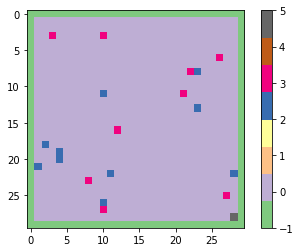

Episode:  0  ,epsilon:  0.8996769578280095  , reward:  -799  , mean reward:  -799 , total steps 408
Episode:  500  ,epsilon:  0.7667131050189898  , reward:  156  , mean reward:  -472 , total steps 401
Episode:  1000  ,epsilon:  0.6727249931227494  , reward:  -355  , mean reward:  -437 , total steps 377
Episode:  1500  ,epsilon:  0.6026867421471859  , reward:  -125  , mean reward:  -410 , total steps 342
Episode:  2000  ,epsilon:  0.5472061003383303  , reward:  -297  , mean reward:  -390 , total steps 325
Episode:  2500  ,epsilon:  0.5024406240458308  , reward:  -353  , mean reward:  -371 , total steps 312
Episode:  3000  ,epsilon:  0.46513860352785696  , reward:  -328  , mean reward:  -359 , total steps 318
Episode:  3500  ,epsilon:  0.43332602872502873  , reward:  -131  , mean reward:  -348 , total steps 306
Episode:  4000  ,epsilon:  0.40614911295604755  , reward:  -382  , mean reward:  -338 , total steps 305
Episode:  4500  ,epsilon:  0.3824952884681533  , reward:  -262  , mean rewa

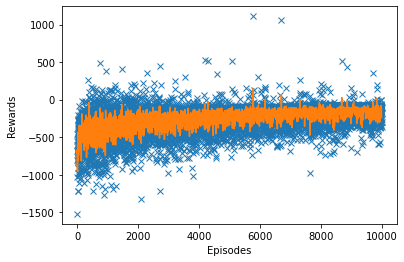

In [60]:
gridworld = AstroidGrid(30,30,10,10,rand_locs=False,fuel=500) 
gridworld.reset_env()
plt.imshow(gridworld.environment,cmap='Accent')
plt.colorbar()
plt.show()
agent = QLearning_SAMAR(gridworld,epsilon = 0.9,gamma=0.9,alpha=0.6)
tic = time.time()
reward,episodes,num_actions = run_Qlearning_episodes(gridworld,agent,num_episodes=10000)
toc = time.time()
print(toc-tic)
print(np.mean(reward))
print(np.std(reward))
plt.plot(episodes,reward,'x')
plt.plot(np.convolve(reward, np.ones(5)/5, mode='valid'),'-')
plt.ylabel('Rewards')
plt.xlabel('Episodes')
plt.show()

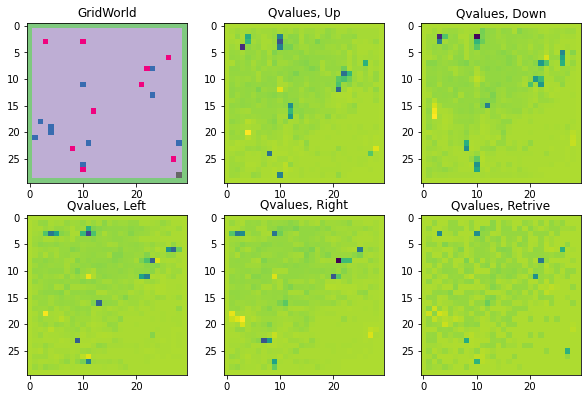

-145.83552152706778
20.184280459744294


In [62]:
min_qval = agent.qtable.min().min()
max_qval = agent.qtable.max().max()
gridsize = [30,30]
plt.figure(figsize=(10,10))
plt.subplot(3,3,1)
plt.imshow(gridworld.environment,cmap='Accent')
plt.title('GridWorld')
plt.subplot(3,3,2)
plt.imshow(agent.qtable['up'].to_numpy().reshape(gridsize[0],gridsize[1]).astype(float),vmin=min_qval,vmax=max_qval)
plt.title('Qvalues, Up')
plt.subplot(3,3,3)
plt.imshow(agent.qtable['down'].to_numpy().reshape(gridsize[0],gridsize[1]).astype(float),vmin=min_qval,vmax=max_qval)
plt.title('Qvalues, Down')
plt.subplot(3,3,4)
plt.imshow(agent.qtable['left'].to_numpy().reshape(gridsize[0],gridsize[1]).astype(float),vmin=min_qval,vmax=max_qval)
plt.title('Qvalues, Left')
plt.subplot(3,3,5)
plt.imshow(agent.qtable['right'].to_numpy().reshape(gridsize[0],gridsize[1]).astype(float),vmin=min_qval,vmax=max_qval)
plt.title('Qvalues, Right')
plt.subplot(3,3,6)
plt.imshow(agent.qtable['retrive'].to_numpy().reshape(gridsize[0],gridsize[1]).astype(float),vmin=min_qval,vmax=max_qval)
plt.title('Qvalues, Retrive')
plt.show()
print(min_qval)
print(max_qval)

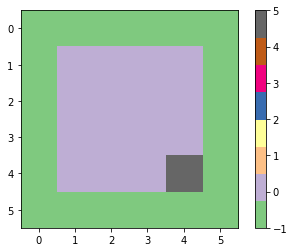

Episode:  0  ,epsilon:  0.8821699783465812  , reward:  -29  , mean reward:  -29 , total steps 21
Episode:  100  ,epsilon:  0.3784036467579848  , reward:  15  , mean reward:  -7 , total steps 6
Episode:  200  ,epsilon:  0.2755593050302877  , reward:  13  , mean reward:  1 , total steps 9
Episode:  300  ,epsilon:  0.22356412797839326  , reward:  15  , mean reward:  5 , total steps 6
Episode:  400  ,epsilon:  0.18803192105566924  , reward:  5  , mean reward:  6 , total steps 14
trial done


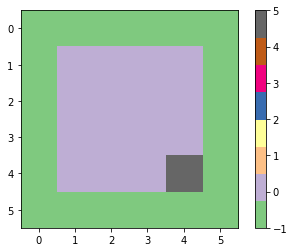

Episode:  0  ,epsilon:  0.8874815732991008  , reward:  -26  , mean reward:  -26 , total steps 19
Episode:  100  ,epsilon:  0.3810630994529462  , reward:  9  , mean reward:  -6 , total steps 10
Episode:  200  ,epsilon:  0.27281607913939265  , reward:  13  , mean reward:  1 , total steps 7
Episode:  300  ,epsilon:  0.2076099905750027  , reward:  11  , mean reward:  2 , total steps 9
Episode:  400  ,epsilon:  0.17443884403752838  , reward:  15  , mean reward:  5 , total steps 6
trial done


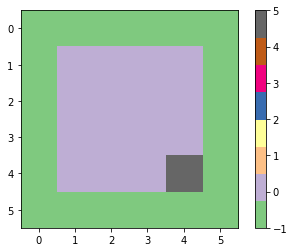

Episode:  0  ,epsilon:  0.8812878083682346  , reward:  -36  , mean reward:  -36 , total steps 23
Episode:  100  ,epsilon:  0.3664805549199686  , reward:  -13  , mean reward:  -12 , total steps 14
Episode:  200  ,epsilon:  0.250825088422465  , reward:  15  , mean reward:  -4 , total steps 6
Episode:  300  ,epsilon:  0.1988676961094361  , reward:  11  , mean reward:  0 , total steps 10
Episode:  400  ,epsilon:  0.16411110958546163  , reward:  13  , mean reward:  0 , total steps 7
trial done


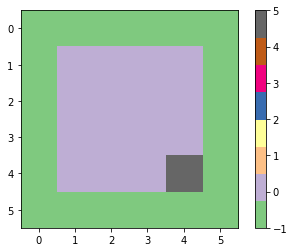

Episode:  0  ,epsilon:  0.8830530313779591  , reward:  -31  , mean reward:  -31 , total steps 21
Episode:  100  ,epsilon:  0.3875998459020395  , reward:  11  , mean reward:  -7 , total steps 11
Episode:  200  ,epsilon:  0.2772184630719862  , reward:  13  , mean reward:  1 , total steps 10
Episode:  300  ,epsilon:  0.21372193136969472  , reward:  13  , mean reward:  2 , total steps 15
Episode:  400  ,epsilon:  0.17743116340926296  , reward:  7  , mean reward:  4 , total steps 13
trial done


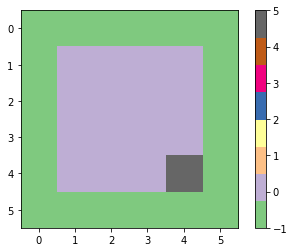

Episode:  0  ,epsilon:  0.8839369683463054  , reward:  -35  , mean reward:  -35 , total steps 21
Episode:  100  ,epsilon:  0.35316202692890336  , reward:  15  , mean reward:  -16 , total steps 8
Episode:  200  ,epsilon:  0.23432799329180157  , reward:  -3  , mean reward:  -9 , total steps 22
Episode:  300  ,epsilon:  0.17939466758700542  , reward:  -15  , mean reward:  -8 , total steps 15
Episode:  400  ,epsilon:  0.13955553771564821  , reward:  -27  , mean reward:  -10 , total steps 17
trial done


In [27]:
alpha_test_rewards = pd.DataFrame()
alpha_test_actions = pd.DataFrame()
for alphat in [0.2,0.4,0.6,0.8,0.999]:
    gridworld = AstroidGrid(6,6,0,0,rand_locs=False,fuel=25) 
    gridworld.reset_env()
    plt.imshow(gridworld.environment,cmap='Accent')
    plt.colorbar()
    plt.show()
    agent = QLearning_SAMAR(gridworld,epsilon = 0.9,gamma=0.9,alpha=alphat)
    tic = time.time()
    reward,episodes,num_actions = run_Qlearning_episodes(gridworld,agent,num_episodes=500)
    
    col_name = 'alpha{}'.format(alphat)
    
    alpha_test_rewards[col_name] = np.convolve(reward, np.ones(5)/5, mode='valid')
    alpha_test_actions[col_name] = np.convolve(num_actions, np.ones(5)/5, mode='valid')
    print('trial done')


In [28]:
import seaborn as sns

Text(0, 0.5, 'Avg. Reward')

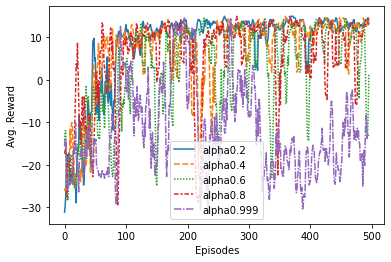

In [29]:
sns.lineplot(data=alpha_test_rewards)
plt.xlabel('Episodes')
plt.ylabel('Avg. Reward')

Text(0, 0.5, 'Avg. Number of Actions')

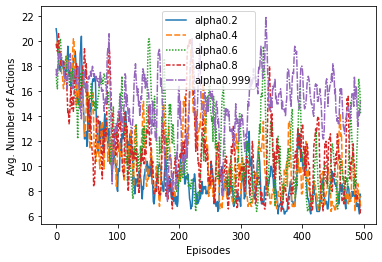

In [30]:
sns.lineplot(data=alpha_test_actions)
plt.xlabel('Episodes')
plt.ylabel('Avg. Number of Actions')

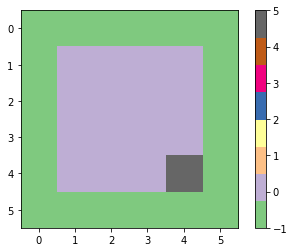

Episode:  0  ,epsilon:  0.8830530313779591  , reward:  -33  , mean reward:  -33 , total steps 22
Episode:  100  ,epsilon:  0.34135054486930433  , reward:  -34  , mean reward:  -16 , total steps 24
Episode:  200  ,epsilon:  0.21074919544499907  , reward:  15  , mean reward:  -17 , total steps 6
Episode:  300  ,epsilon:  0.160057189790464  , reward:  -14  , mean reward:  -13 , total steps 15
Episode:  400  ,epsilon:  0.13221582481472918  , reward:  3  , mean reward:  -10 , total steps 17
trial done


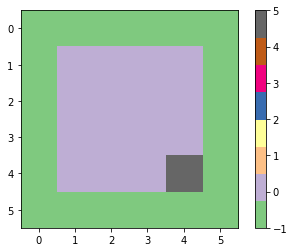

Episode:  0  ,epsilon:  0.8821699783465812  , reward:  -31  , mean reward:  -31 , total steps 22
Episode:  100  ,epsilon:  0.3624693648978475  , reward:  -15  , mean reward:  -11 , total steps 14
Episode:  200  ,epsilon:  0.24170967720577577  , reward:  -16  , mean reward:  -7 , total steps 16
Episode:  300  ,epsilon:  0.18357067317399667  , reward:  13  , mean reward:  -5 , total steps 8
Episode:  400  ,epsilon:  0.14510856042378759  , reward:  15  , mean reward:  -5 , total steps 6
trial done


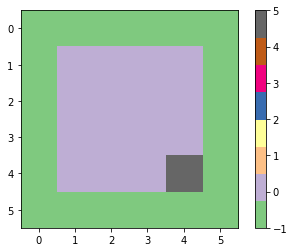

Episode:  0  ,epsilon:  0.8830530313779591  , reward:  -28  , mean reward:  -28 , total steps 21
Episode:  100  ,epsilon:  0.3624693648978475  , reward:  9  , mean reward:  -10 , total steps 14
Episode:  200  ,epsilon:  0.2600239778718029  , reward:  15  , mean reward:  -1 , total steps 7
Episode:  300  ,epsilon:  0.2004658208452793  , reward:  -12  , mean reward:  1 , total steps 14
Episode:  400  ,epsilon:  0.16995967577229645  , reward:  15  , mean reward:  3 , total steps 6
trial done


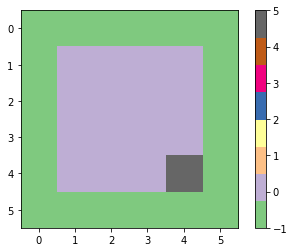

Episode:  0  ,epsilon:  0.8830530313779591  , reward:  -29  , mean reward:  -29 , total steps 20
Episode:  100  ,epsilon:  0.3545782137325093  , reward:  -19  , mean reward:  -12 , total steps 17
Episode:  200  ,epsilon:  0.2500733653816378  , reward:  9  , mean reward:  -4 , total steps 14
Episode:  300  ,epsilon:  0.20410871501198194  , reward:  13  , mean reward:  0 , total steps 8
Episode:  400  ,epsilon:  0.17566481492299996  , reward:  15  , mean reward:  3 , total steps 6
trial done


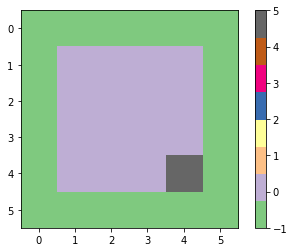

Episode:  0  ,epsilon:  0.8839369683463054  , reward:  -29  , mean reward:  -29 , total steps 21
Episode:  100  ,epsilon:  0.3697954321903919  , reward:  11  , mean reward:  -5 , total steps 12
Episode:  200  ,epsilon:  0.26263857636101795  , reward:  15  , mean reward:  1 , total steps 6
Episode:  300  ,epsilon:  0.2020767883038033  , reward:  15  , mean reward:  3 , total steps 8
Episode:  400  ,epsilon:  0.17391605064750906  , reward:  13  , mean reward:  5 , total steps 8
trial done


In [35]:
gamma_test_rewards = pd.DataFrame()
gamma_test_actions = pd.DataFrame()
for gammat in [0.1,0.3,0.5,0.7,0.9]:
    gridworld = AstroidGrid(6,6,0,0,rand_locs=False,fuel=25) 
    gridworld.reset_env()
    plt.imshow(gridworld.environment,cmap='Accent')
    plt.colorbar()
    plt.show()
    agent = QLearning_SAMAR(gridworld,epsilon = 0.9,gamma=gammat,alpha=0.6)
    tic = time.time()
    reward,episodes,num_actions = run_Qlearning_episodes(gridworld,agent,num_episodes=500)
    
    col_name = 'gamma{}'.format(gammat)
    
    gamma_test_rewards[col_name] = np.convolve(reward, np.ones(5)/5, mode='valid')
    gamma_test_actions[col_name] = np.convolve(num_actions, np.ones(5)/5, mode='valid')
    print('trial done')

Text(0, 0.5, 'Avg. Reward')

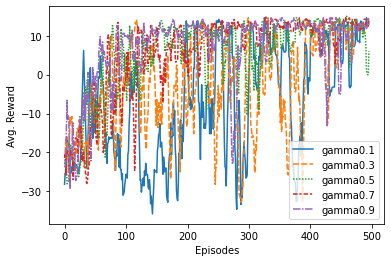

In [36]:
sns.lineplot(data=gamma_test_rewards)
plt.xlabel('Episodes')
plt.ylabel('Avg. Reward')

Text(0, 0.5, 'Avg. Number of Actions')

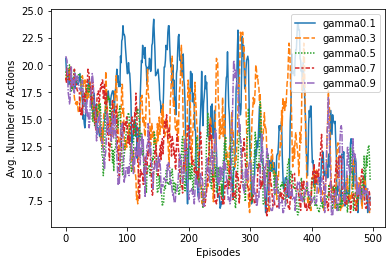

In [38]:
sns.lineplot(data=gamma_test_actions)
plt.xlabel('Episodes')
plt.ylabel('Avg. Number of Actions')

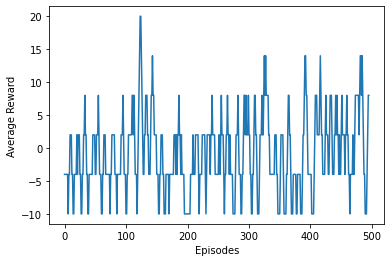

-0.82
13.824890596312146


In [25]:
env1 = AstroidGrid(5,5,1,1,rand_locs=False,fuel=20)
env1.reset_env()
done = False


cumulative_reward  = []
total_actions      = []
episodes           = []



for i in range(500):
    
    num_total_actions  = 0
    
    env1.reset_env()
    done = False
    num_total_actions = 0
    while done!=True:
        action = random.choice(env1.action_list)
        
        reward,cumreward,new_agent_pos,_,done = env1.take_action(action)
        
        num_total_actions +=1
        
    
        
    
    episodes.append(i)
    cumulative_reward.append(reward)
    total_actions.append(num_total_actions)

plt.plot(np.convolve(cumulative_reward, np.ones(5)/5, mode='valid'),'-')
plt.xlabel('Episodes')
plt.ylabel('Average Reward')
plt.show()


print(np.mean(cumulative_reward))
print(np.std(cumulative_reward))

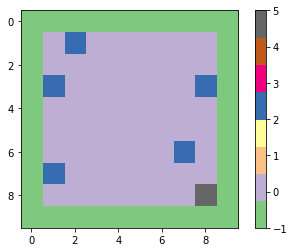

Episode:  0  ,epsilon:  0.8996544661739642  , reward:  -54  , mean reward:  -54 , total steps 423
34.03904867172241
28.724
78.80954145279618


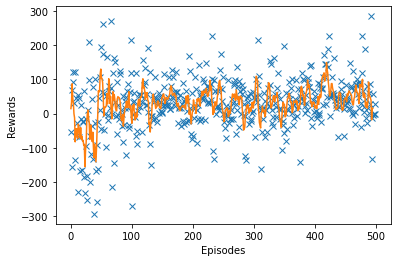

In [64]:
gridworld = AstroidGrid(10,10,5,0,rand_locs=False,fuel=500) 
gridworld.reset_env()
plt.imshow(gridworld.environment,cmap='Accent')
plt.colorbar()
plt.show()
agent = QLearning_SAMAR(gridworld,epsilon = 0.9,gamma=0.9,alpha=0.6)
tic = time.time()
reward,episodes,num_actions = run_Qlearning_episodes(gridworld,agent,num_episodes=500)
toc = time.time()
print(toc-tic)
print(np.mean(reward))
print(np.std(reward))
plt.plot(episodes,reward,'x')
plt.plot(np.convolve(reward, np.ones(5)/5, mode='valid'),'-')
plt.ylabel('Rewards')
plt.xlabel('Episodes')
plt.show()